In [12]:
using MatrixNetworks
using Distributions
using Gadfly
using Clustering
using BenchmarkTools, Compat
using DelimitedFiles
using SparseArrays
using LinearAlgebra
using SphericalGraphEmbedding
using Random

### LFR benchmark
Loading data and random permute

In [13]:
# Loading data
community0 = readdlm("Data/LFRBenchmarks/LFR3/community.dat");
adj = readdlm("Data/LFRBenchmarks/LFR3/network.dat");

# converting to int array
community_true = community0[:,2];
community_true = convert(Array{Int64},community_true);

N = length(community_true);

# construct adjacency matrix
n_edge2 = size(adj)[1];
A = sparse(adj[:,1],adj[:,2],vec(ones(Int64,n_edge2,1)),N,N)

# largest connected component
A,_ = largest_component(A);
adj = 0; # clear memory

# random (unif) permutation
ind = randperm(N)
A = A[ind,ind];
community_true = community_true[ind];

Embed and cluster

In [15]:
# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-8;

# number of columns of initial guess
r = 40;

# number of centroids thrown in embedding
n_clusters = 10;

# nb of times vector partition is repeated
n_it_vec_part = 10;

# nb updates vec part
n_updates = 100; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, r);

# normalized multual information
nmi = mutualinfo(community_true,community)
println("NMI with ground truth: ", nmi)

# beware run twice to get timings without compilation time

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 89 iterations
  1.328540 seconds (2.48 k allocations: 488.630 MiB, 7.13% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 40
Number of updates: 6
Number of communities: 5
Modularity: 0.5745698945325598
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.4568278951118213, 0.3902406295588761, 0.152909084373822, 2.237086660362691e-5, 5.8135162854664255e-9]
 -------------------------------------------- 
  1.624241 seconds (417.55 k allocations: 644.446 MiB, 8.56% gc time)
NMI with ground truth: 1.0


Plotting coordinates 1-2

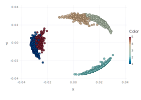

In [16]:
# Plotting 2D-projection
plot(x=x_embed[1,:],y=x_embed[2,:], color = community)
# the colors are the retreived communities

Plotting coordinates 2-3

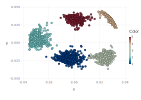

In [17]:
plot(x=x_embed[2,:],y=x_embed[3,:], color = community)

### Power EU graph
Loading data

In [18]:
m = readdlm("Data/PowerEU/ElistPowerEU.txt");
dim = size(m,1);

M_int = zeros(Int64,dim,2);
for i =1:dim
	for j=1:2
		M_int[i,j] = Int64(m[i,j]);
	end
end

N = maximum([maximum(M_int[:,1]),maximum(M_int[:,2])]);

A0 =spzeros(N,N);
A0 = sparse(M_int[:,1],M_int[:,2],vec(ones(Int64,dim,1)),N,N);
A0 = A0+A0';
A,p = largest_component(A0);

A0=0;p=0;m =0;

In [22]:
# nb iterations projected power method
n_it_PPM = 30000;

# relative objective variation
t = 1e-10;

# number of columns of initial guess
r = 50;

# number of centroids thrown in embedding
n_clusters = 100;

# nb of times vector partition is repeated
n_it_vec_part = 1000;

# nb updates vec part
n_updates = 100; # by default

# shape of embedding
shape = "Ellipsoidal"; #shape = "Spherical"

# Initialization
community = zeros(Int64,N,1);
x_embed,community =  @time sphere_embed_cluster(A, n_it_PPM, t, n_clusters, n_it_vec_part, n_updates, shape, r)


# beware run twice to get timings without compilation time

 ------- Acc Projected Power Iteration -------
The iteration has become stationary after 465 iterations
  6.952806 seconds (13.66 k allocations: 4.249 GiB, 12.33% gc time)
 -------------- Clustering ------- 
dimension of embedding used for clustering: 50
Number of updates: 6
Number of communities: 41
Modularity: 0.9133016291626354
 -------------------------------------------- 
The first 5 squared singular values divided by N : 
[0.5413266183265616, 0.34375273979974214, 0.11387634440341407, 0.0005021421569687065, 0.00029033499690449017]
 -------------------------------------------- 
 81.002055 seconds (22.84 M allocations: 22.378 GiB, 6.47% gc time)


([-0.015086557007982114 -0.014907755820603849 … 0.006792046144912054 0.0059520409282766635; -0.004845341921353093 -0.005577930072445133 … 0.03157587413447935 0.03183621771186004; … ; -0.007964866957259693 -0.010987858416001493 … -0.008826355948398793 -0.016903163061904928; 0.011685660086799492 0.01161224748438616 … 0.007528851275845498 0.009089350429129693], [1, 1, 2, 2, 2, 1, 1, 3, 4, 4  …  36, 36, 36, 36, 36, 36, 36, 36, 36, 36])

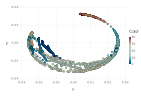

In [20]:
# Plotting 2D-projection
plot(x=x_embed[1,:],y=x_embed[2,:], color = community)
# the colors are the retreived communities

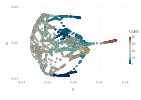

In [21]:
plot(x=x_embed[2,:],y=x_embed[3,:], color = community)